# Utilizando _astropy_ para realização de fotometria de imagens obtidas por telescópios
Este tutorial deverá ser usado no _jupyter notebook_ e não no _jupyter lab_ pois requer para construir gŕaficos interativos e o _lab_ requer o _node.js_ para esse recurso, o que não foi instalado ainda nos seus computadores

## 1. Abrindo o arquivo

In [ ]:
from astropy.io import fits

In [ ]:
f = fits.open('a1.fit')

## 2. Passando a matriz com a imagem para uma variável para simplificar

In [32]:
data = f[0].data
data

array([[ 75, 121, 106, ..., 100,  89, 100],
       [121,  80, 101, ...,  85, 103,  89],
       [109, 108,  86, ..., 112,  89,  95],
       ...,
       [124, 105,  95, ...,  90, 123, 119],
       [ 91, 108, 120, ..., 118, 114,  97],
       [ 99, 112,  97, ...,  97, 122,  91]], dtype=int16)

## 3. Normalização da image

### 3.1. Biblioteca para interagir com o gráfico
Essa biblioteca deve ser chamada antes das bibliotecas da _matplotlib_ do contrário os controles de interação não se ligarão ao gráfico

In [39]:
# interact é bom para olhar os resultados de imediato, porém não há aproveitamento futuro dos resultados
# interactive é melhor para aproveitar as variáveis para uso posterior
from ipywidgets import interact, interactive
from IPython.display import display

### 3.2. Bibliotecas para plotagem e normalização

In [82]:
from matplotlib import pyplot as plt
from astropy.visualization.mpl_normalize import ImageNormalize
from astropy.visualization import ContrastBiasStretch

### 3.3. Fazendo a normalização

In [83]:
# Observe a imagem sem normalizar
plt.imshow(data, cmap='Greys') # atenção à imagem com o norm iniciado

In [84]:
def double_number(x,y):
    norm = ImageNormalize(stretch=ContrastBiasStretch(x,y))
    contr, bias = x,y # para que os valores sejam entregues
    im = plt.imshow(data, norm=norm, cmap='Greys')
    plt.show()

Atribui para um objeto a interação

In [85]:
w = interactive(double_number, x=(-50, 50, 0.003),y=(-0.5,0.5,0.003))

In [51]:
ContrastBiasStretch

Mostra a interação

In [87]:
%matplotlib inline
display(w) # esse passo é fundamental

interactive(children=(FloatSlider(value=-0.0020000000000024443, description='x', max=50.0, min=-50.0, step=0.0…

Veja o resultado após os ajustes

In [88]:
w.kwargs

{'x': -24.809, 'y': 0.049}

De agora em diante é possível plotar a imagem com os dados da normalização

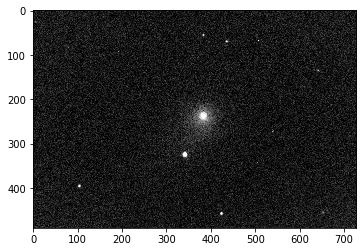

In [89]:
contr, bias = w.kwargs['x'], w.kwargs['y'] # para os valores para variáveis com nomes mais amigáveis
norm = ImageNormalize(stretch=ContrastBiasStretch(contr, bias)) # define a normalização
plt.imshow(data, norm=norm, cmap='Greys') # usa ela ao plotar a imagem
plt.show() # passo opcional quando se usa o jupyter notebook

## 4. Plotando círculos para selecionar as estrelas ou objetos na foto

In [90]:
!pip3 install --no-deps photutils --user

### 4.1. Instalando a _photutils_ e importando
É necessário instalar o pacote _photutils_ do astropy use 
```shell
pip3 install --no-deps photutils --user
```
no _power shell_ (_Windows 10_) ou no _terminal_ (_Linux_) para instalar esse biblioteca, após isso será possível importá-la.

In [91]:
from photutils import CircularAperture, aperture_photometry

### 4.2. Plotar círculos na imagem

Defina as posições -- vetores no plano x,y -- e o objeto das aberturas circulares

In [92]:
positions = [(30., 30.), (40., 40.)]
apertures = CircularAperture(positions, r=20)

Perceba os dois círculos amarelos que aparecem na imagem após as linhas abaixo. Diverta-se mudando as posições acima e o raio

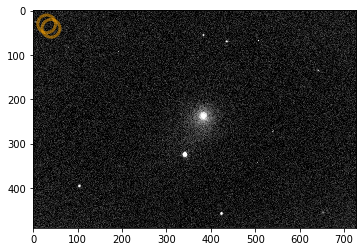

In [93]:
plt.imshow(data, norm=norm, cmap='Greys')
apertures.plot(color='orange', lw=3, alpha=0.5)

### 4.3. Plotando de forma interativa

É possível ajeitar a posição e o raio usando o _interactive_. Primeiro perga-se o número de linhas e colunas para sabermos o intervalo em que podemos percorrer a figura

In [94]:
linhas = len(data)
colunas = len(data[1])

Define-se a função que irá interajir

In [95]:
def ajeitar(x,y,r):
    position = [(x, y)]
    apertures = CircularAperture(position, r=r)
    im = plt.imshow(data, norm=norm, cmap='Greys')
    apertures.plot(color='yellow', lw=1, alpha=0.5)
    plt.show()

Divirta-se mexendo nos intervalos para o raio sempre usando a estrutura (raio_menor,raio_maior,acrescimo_pra_aumentar_o_raio)

In [96]:
w = interactive(ajeitar,x=(0, colunas, 1),y=(0, linhas,1.5),r=(0.1,50,2))

Divirta-se tentando acertar as posições de forma interativa e ajustando o raio de forma a englobar toda a luz da estrela mais próxima do objeto central e ajuste o raio a ultrapassar pouco a luz dele

In [98]:
display(w)

interactive(children=(IntSlider(value=384, description='x', max=728), FloatSlider(value=238.5, description='y'…

Resultados

In [99]:
w.kwargs

{'x': 384, 'y': 238.5, 'r': 48.1}

## 5. Aumentando a interatividade, interagir com a imagem usando o clique

É possível interagir com a imagem de forma mais interativa usando o comando mágico ```%matplotlib nbagg``` no início da célula experimente plotar a imagem após escrever isso no início da célular, ela será mostrada numa caixa que possui algumas ferramentas, experimente um pouco tais ferramentas

Use abaixo _nbagg_ ao invés de _widget_ se você está no _jupyter notebook_

In [100]:
%matplotlib notebook

Experimente as ferramentas após o executar a linha para o _plot_ da imagem

<IPython.core.display.Javascript object>


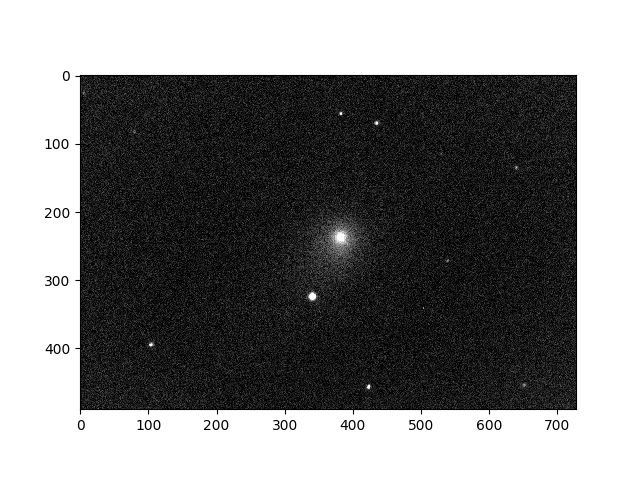

In [101]:
plt.imshow(data, norm=norm, cmap='Greys')

In [102]:
plt.close('all')

Para que possamos pegar as posições a partir do clique na imagem, é necessário definir uma função que executará o que queremos fazer ao se clicar na imagem, basicamente queremos que as coordenadas sejam copiadas para que sejam usadas no restante do programa.

P.S.: Sempre desligue a imagem após usar ela, se não desligar as próximas plotagens irão aparecer sempre na imagem que não está desligada

## 5.1. Plotando para interagir com o clique

Após executar e ler cuidadosamente os códigos abaixo, tente clicar em algumas estrelas e verificar a lista de coordenadas

<IPython.core.display.Javascript object>


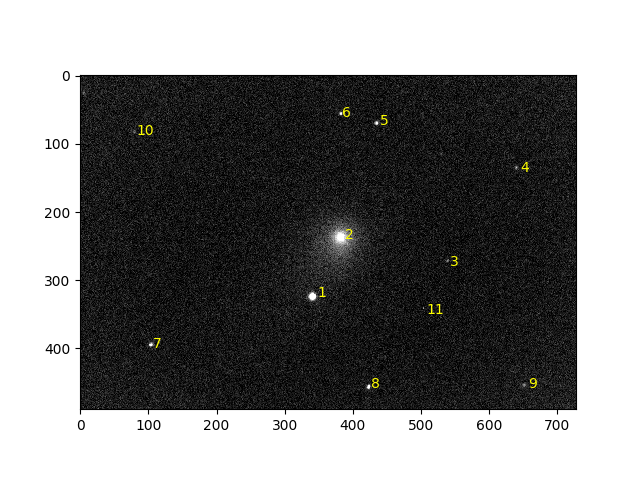

In [103]:
fig = plt.figure() # image em branco
ax = fig.add_subplot(111) # adiciona um eixo na imagem
ax.imshow(data, norm=norm, cmap='Greys') # plota a imagem no eixo, veja que norm já foi definido bem antes

coords = [] # list que armazena as coordenadas x,y clicadas
n = 0 # variável que contabiliza o número de objetos clicados

def ao_clicar(event): # esse parâmetro sempre tem que se chamar event
    '''
    Essa função define tudo que se irá fazer ao clicar na imagem.
    O fato de estar escrevendo entre três aspas simples (docstring) é a forma de criar documentação dentro das
    funções que criamos no python. Lembra que no jupyter se escrevermos um funcao e colocarmos ? ao final ou no
    início, a documentação é exibida? Pois bem, aquela documentação é escrita dentro dessa estrutura de três
    aspas, tente executar com SHIT+ENTER essa definição depois usa na próxima célula
    ?ao_clica ou ao_clicar?
    Acaba a docstring fecha com três aspas e comece a escrever a função.
    '''
    
    # pega as coordenadas que foram clicadas
    global ix,iy
    ix, iy = event.xdata, event.ydata
    
    # a lista de coordenadas deve ser iniciada fora dessa função e o número de estrelas clicadas também deve ser
    # iniciado fora, por isso elas leval a designação global
    global coords, n
    # usei zero abaixo, pois a estrutura de coordenadas do astropy aceita x,y,z; mas nesse
    # caso só necessitamos de x e y, veja que o append é usado, isso implica que coords é
    # um lista
    coords.append((ix, iy))
    # incrementa o número de estrelas clicadas, pois essa função é executada a cada clique
    n = n+1
    # adiciona texto no objeto de nome ax do tipo eixo da matplotlib
    ax.text(ix, iy, str(n), color='yellow')

cid = fig.canvas.mpl_connect('button_press_event', ao_clicar) # finalmente liga o evento de clique na figura

In [26]:
ao_clicar?

In [105]:
print(n,coords)

11 [(348.6849798387097, 325.34964717741934), (388.3140120967742, 240.22061491935483), (542.4269153225807, 279.84964717741934), (645.1688508064517, 141.8819052419355), (439.6849798387097, 72.8980342741936), (383.91078629032256, 61.15609879032263), (106.50756048387096, 400.2044858870967), (426.4753024193548, 458.91416330645154), (656.9107862903227, 458.91416330645154), (83.02368951612904, 87.57545362903232), (508.66885080645164, 350.30126008064514)]


## 5.2. Procedendo com a fotometria de abertura
Extendendo um pouco a a seção __4__

A função responsável por esse procedimento é 
``` python
aperture_photometry(dados_da_imagem, objeto_de_abertura)
```
mas antes é necessário escolher a forma da abertura, vamos usar a mais simples com 
``` python
CircularAperture(posicoes, raio)
```
note que é necessária uma lista de posições e um valor de raio para as aberturas circulares, vamos fazer isso então

In [106]:
from photutils import aperture_photometry, CircularAperture

In [108]:
# como nós ajustamos o valor do raio quando estávamos interagindo com as aberturas circulares
abertura = CircularAperture(coords,w.kwargs['r'])

Uma função para clicar nas estrelas que deseja obter as intensidades, tente anotar a diferença com a função anterior

<IPython.core.display.Javascript object>


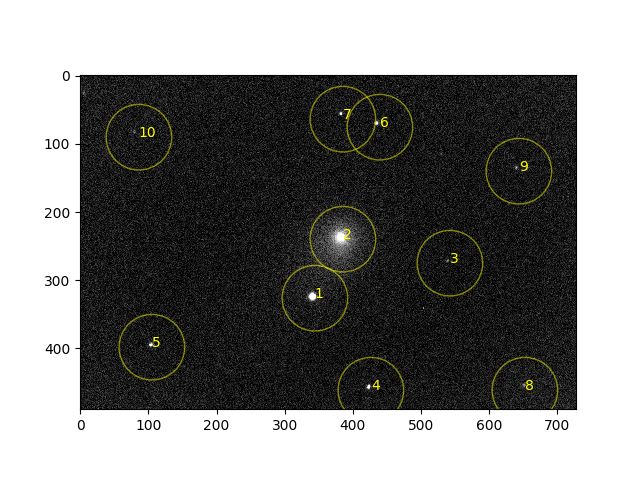

In [109]:
%matplotlib notebook

fig = plt.figure() # image em branco
ax = fig.add_subplot(111) # adiciona um eixo na imagem
ax.imshow(data, norm=norm, cmap='Greys') # plota a imagem no eixo, veja que norm já foi definido bem antes

coords = [] # list que armazena as coordenadas x,y clicadas
n = 0 # variável que contabiliza o número de objetos clicados
r = w.kwargs['r']

def ao_clicar(event): # esse parâmetro sempre tem que se chamar event    
    
    global coords, n, apertures, r
    
    # este if fecha a interação com a figura quando se clica com o botão 
    # direto, e salva as aberturas clicadas com o botão esquerdo
    if event.button == 3: # três significa o botão direito do mouse
        apertures = CircularAperture(coords,r)
        fig.canvas.mpl_disconnect(cid)
        plt.close(1)
        return None
    
    global ix,iy
    ix, iy = event.xdata, event.ydata
    
    coords.append((ix, iy))
    n = n+1
    apertures = CircularAperture([[ix,iy]],r)
    ax.text(ix, iy, str(n), color='yellow')
    apertures.plot(color='yellow', lw=1, alpha=0.5,ax=ax)

cid = fig.canvas.mpl_connect('button_press_event', ao_clicar) # finalmente liga o evento de clique na figura

In [110]:
plt.close('all')

In [ ]:
apertures.plot?

In [111]:
coords

[(344.28175403225805, 326.3816532258064),
 (385.37852822580646, 239.78487903225806),
 (542.4269153225807, 275.01068548387093),
 (426.4753024193548, 461.4139112903225),
 (105.03981854838709, 398.30100806451605),
 (439.6849798387097, 75.39778225806458),
 (385.37852822580646, 63.655846774193606),
 (652.507560483871, 461.4139112903225),
 (643.7011088709678, 139.9784274193549),
 (85.95917338709678, 90.07520161290324)]

In [112]:
apertures

<CircularAperture([[344.28175403, 326.38165323],
                   [385.37852823, 239.78487903],
                   [542.42691532, 275.01068548],
                   [426.47530242, 461.41391129],
                   [105.03981855, 398.30100806],
                   [439.68497984,  75.39778226],
                   [385.37852823,  63.65584677],
                   [652.50756048, 461.41391129],
                   [643.70110887, 139.97842742],
                   [ 85.95917339,  90.07520161]], r=48.1)>

Procedendo com a fotometria de abertura

In [114]:
tabela = aperture_photometry(data, apertures)
tabela

id,xcenter,ycenter,aperture_sum
,pix,pix,
int64,float64,float64,float64
1,344.28175403225805,326.3816532258064,840349.3365929727
2,385.37852822580646,239.78487903225806,924101.6021531855
3,542.4269153225807,275.01068548387093,705147.9815648202
4,426.4753024193548,461.4139112903225,615581.2792565203
5,105.03981854838709,398.30100806451605,728401.914944803
6,439.6849798387097,75.39778225806458,722773.3599338002
7,385.37852822580646,63.655846774193606,724010.3566731943
8,652.507560483871,461.4139112903225,636760.5897895345


Veja que a fotometria foi calculada, temos três colunas na tabela, as duas primeiras são as coordenadas $x,y$ das estrelas escolhidas, e a terceira coluna é a soma dos valores dos pixels dentro da abertura definida, tente ajustar novos valores de raio e observar o quanto esse valor aumenta.

## 5.3. Extração do céu

O resultado acima apesar de conter a soma dos fótons que chegou até cada pixels da imagem, não condiz com a luz apenas do objeto observado, existe o brilho do próprio céu ao fundo, proveniente da própria atmosfera e poluição refletindo fontes luminozas na própria superfície da terra.

A forma mais simples de extrair a informação proveniente do céu (visto que queremos estudar apenas objetos fora da atmosfera terrestre) é escolher alguns pontos do fundo, usando o mesmo procedimento para selecionar as estrelas e observando uma estatística simples sobre os valores dos _pixels_ selecionados.

Desta vez clique em pontos afastados dos objetos brilhantes.

<IPython.core.display.Javascript object>


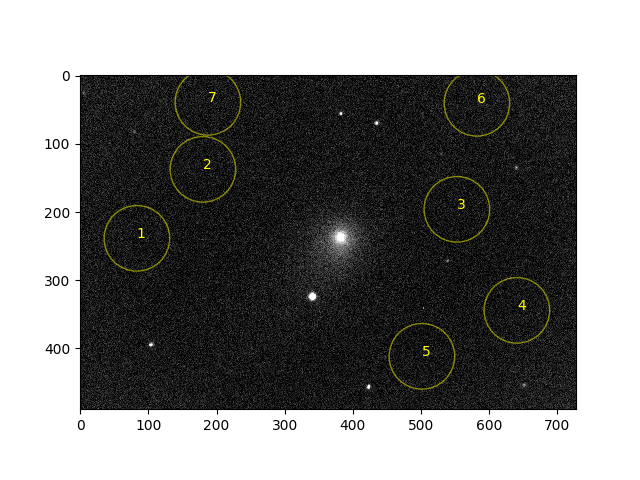

In [115]:
%matplotlib notebook

fig = plt.figure() # image em branco
ax = fig.add_subplot(111) # adiciona um eixo na imagem
ax.imshow(data, norm=norm, cmap='Greys') # plota a imagem no eixo, veja que norm já foi definido bem antes

coords = [] # list que armazena as coordenadas x,y clicadas
n = 0 # variável que contabiliza o número de objetos clicados
r = w.kwargs['r']

def ao_clicar(event): # esse parâmetro sempre tem que se chamar event    
    
    global coords, n, apertures, r
    
    # este if fecha a interação com a figura quando se clica com o botão 
    # direto, e salva as aberturas clicadas com o botão esquerdo
    if event.button == 3: # três significa o botão direito do mouse
        apertures = CircularAperture(coords,r)
        fig.canvas.mpl_disconnect(cid)
        plt.close(1)
        return None
    
    global ix,iy
    ix, iy = event.xdata, event.ydata
    
    coords.append((ix, iy))
    n = n+1
    apertures = CircularAperture([[ix,iy]],r)
    ax.text(ix, iy, str(n), color='yellow')
    apertures.plot(color='yellow', lw=1, alpha=0.5,ax=ax)

cid = fig.canvas.mpl_connect('button_press_event', ao_clicar) # finalmente liga o evento de clique na figura

Utiliza uma variável por exemplo _ceu_ para guardar dos dados dos pixels, para fazer isso poderá usar a mácara dos dados de abertura para colecionar apenas o pixels do céu que foram selecionados.

In [116]:
mascara_ceu = apertures.to_mask(method='center') # faz a máscara que exibe apenas os pixels dos círculos escolhidos
mascara_ceu

Agora coloque todos os _pixels selecionados_ em um único vetor

In [117]:
pixels_ceu = []
for i in range(len(mascara_ceu)):
    dados_ceu = mascara_ceu[i].multiply(data)
    pixels_ceu = pixels_ceu + dados_ceu[mascara_ceu[i].data>0].tolist()
pixels_ceu # essa lista possui agora todos os pixels dentro dos circulos selecionados

[117.0,
 112.0,
 88.0,
 81.0,
 92.0,
 111.0,
 99.0,
 82.0,
 101.0,
 85.0,
 86.0,
 99.0,
 93.0,
 97.0,
 99.0,
 71.0,
 87.0,
 108.0,
 106.0,
 103.0,
 87.0,
 96.0,
 118.0,
 108.0,
 94.0,
 109.0,
 86.0,
 54.0,
 96.0,
 105.0,
 95.0,
 95.0,
 94.0,
 99.0,
 97.0,
 98.0,
 92.0,
 100.0,
 106.0,
 91.0,
 109.0,
 94.0,
 109.0,
 109.0,
 94.0,
 85.0,
 93.0,
 91.0,
 102.0,
 92.0,
 111.0,
 85.0,
 88.0,
 114.0,
 95.0,
 90.0,
 87.0,
 74.0,
 101.0,
 101.0,
 92.0,
 97.0,
 95.0,
 115.0,
 83.0,
 106.0,
 92.0,
 87.0,
 89.0,
 98.0,
 115.0,
 104.0,
 93.0,
 97.0,
 97.0,
 113.0,
 110.0,
 87.0,
 108.0,
 109.0,
 103.0,
 110.0,
 102.0,
 93.0,
 106.0,
 100.0,
 95.0,
 96.0,
 96.0,
 103.0,
 90.0,
 100.0,
 91.0,
 89.0,
 118.0,
 96.0,
 105.0,
 92.0,
 100.0,
 81.0,
 98.0,
 120.0,
 99.0,
 102.0,
 100.0,
 98.0,
 106.0,
 110.0,
 114.0,
 95.0,
 95.0,
 102.0,
 103.0,
 95.0,
 99.0,
 87.0,
 97.0,
 74.0,
 122.0,
 118.0,
 109.0,
 101.0,
 104.0,
 102.0,
 84.0,
 100.0,
 98.0,
 125.0,
 99.0,
 83.0,
 86.0,
 104.0,
 99.0,
 92.0,
 120.0

## 5.4. Procedendo com a estatística

Agora que temos todos os valores numa lista podemos calcular a estatística que irá definir o valor da intensidade mediana do céu, 

In [118]:
from astropy.stats import sigma_clipped_stats # função de procede com a estatística desejada

In [119]:
_,ceu,_ = sigma_clipped_stats(pixels_ceu)
ceu

99.0

Veja que este resultado se assemelha muito a uma média simples dos _pixels_ escolhidos, tente traduzir a expressão em python abaixo para o matematiquês

In [122]:
sum(aperture_photometry(data,apertures)['aperture_sum'])/(7*apertures.area)

97.57021241170543

## 5.5. Fotometria com a extração do céu

Clique agora em algumas extrelas com cuidado para elas ficarem no centro do círculo

<IPython.core.display.Javascript object>


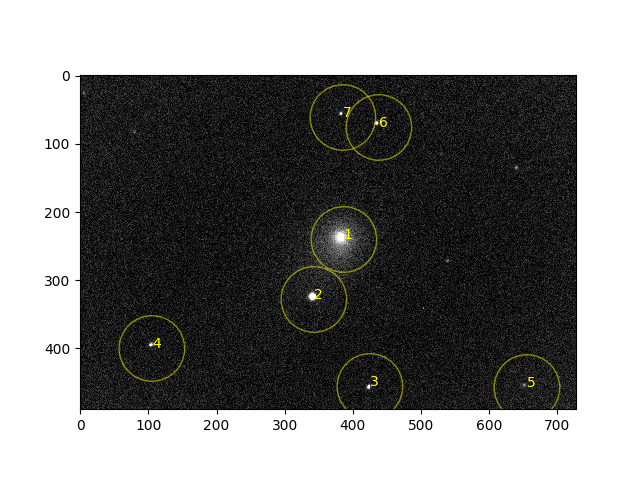

In [123]:
%matplotlib notebook

fig = plt.figure() # image em branco
ax = fig.add_subplot(111) # adiciona um eixo na imagem
ax.imshow(data, norm=norm, cmap='Greys') # plota a imagem no eixo, veja que norm já foi definido bem antes

coords = [] # list que armazena as coordenadas x,y clicadas
n = 0 # variável que contabiliza o número de objetos clicados
r = w.kwargs['r']

def ao_clicar(event): # esse parâmetro sempre tem que se chamar event    
    
    global coords, n, apertures, r
    
    # este if fecha a interação com a figura quando se clica com o botão 
    # direto, e salva as aberturas clicadas com o botão esquerdo
    if event.button == 3: # três significa o botão direito do mouse
        apertures = CircularAperture(coords,r)
        fig.canvas.mpl_disconnect(cid)
        plt.close(1)
        return None
    
    global ix,iy
    ix, iy = event.xdata, event.ydata
    
    coords.append((ix, iy))
    n = n+1
    apertures = CircularAperture([[ix,iy]],r)
    ax.text(ix, iy, str(n), color='yellow')
    apertures.plot(color='yellow', lw=1, alpha=0.5,ax=ax)

cid = fig.canvas.mpl_connect('button_press_event', ao_clicar) # finalmente liga o evento de clique na figura

Olhando o resultodo

In [124]:
apertures

<CircularAperture([[386.84627016, 240.22061492],
                   [342.8140121 , 328.28513105],
                   [425.00756048, 455.97867944],
                   [105.03981855, 400.20448589],
                   [655.44304435, 457.44642137],
                   [438.2172379 ,  75.83351815],
                   [385.37852823,  61.15609879]], r=48.1)>

Procedendo com a fotometria

In [125]:
aperture_photometry(data-ceu,apertures)

id,xcenter,ycenter,aperture_sum
,pix,pix,
int64,float64,float64,float64
1,386.8462701612903,240.22061491935483,203909.6519432643
2,342.8140120967742,328.2851310483871,118709.3578382855
3,425.0075604838709,455.9786794354838,3879.115738867881
4,105.03981854838709,400.2044858870967,9469.89059210109
5,655.4430443548388,457.44642137096764,26699.06973037868
6,438.2172379032258,75.83351814516129,3188.7775091836506
7,385.37852822580646,61.15609879032263,4882.282581976541


A quarta coluna, *aperture_sum*, contém os fluxos de cada estrela, tais resultados são importantes para criar a curva de luz de um objeto, estrela variável, asteróides, cometas, etc. Uma vez que basicamente esse dado, ou alguma trasformação calculada em cima deles é que é usada nas análises de curva de luz.